In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(80013493)
tf.set_random_seed(80013493)

In [2]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
#필터 갯수에 따라 노드 수를 결정
num_filters = 16
num_units = 14*14*num_filters

x = tf.placeholder(tf.float32, [None, 784])
x_image = tf.reshape(x, [-1,28,28,1])

W_conv = tf.get_variable("w_conv", [5,5,1,num_filters],initializer=tf.contrib.layers.xavier_initializer())
h_conv = tf.nn.conv2d(x_image, W_conv, strides=[1,1,1,1], padding='SAME')
h_pool = tf.nn.max_pool(h_conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [0]:
h_pool_flat = tf.reshape(h_pool, [-1,14*14*num_filters])


w1 = tf.get_variable("w1", shape=[num_units, num_units],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.zeros([num_units]))
L1 = tf.nn.relu(tf.matmul(h_pool_flat, w1) + b1)

w2 = tf.get_variable("w2", shape=[num_units, 10],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.zeros([10]))
p = tf.nn.softmax(tf.matmul(L1, w2) + b2)

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t*tf.log(p))
train_step = tf.train.AdamOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(4000):
  i += 1
  batch_xs, batch_ts = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
  if i % 100 == 0:
    loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
    print('Step: %d, Loss: %f, Accuracy: %f' %(i, loss_val, acc_val))

Step: 100, Loss: 2420.506348, Accuracy: 0.931200
Step: 200, Loss: 1504.674561, Accuracy: 0.953900
Step: 300, Loss: 1215.842041, Accuracy: 0.963300
Step: 400, Loss: 1039.913086, Accuracy: 0.967600
Step: 500, Loss: 770.447327, Accuracy: 0.976600
Step: 600, Loss: 810.867859, Accuracy: 0.976200
Step: 700, Loss: 713.689880, Accuracy: 0.977500
Step: 800, Loss: 636.115723, Accuracy: 0.979300
Step: 900, Loss: 625.900574, Accuracy: 0.980900
Step: 1000, Loss: 598.816467, Accuracy: 0.981900
Step: 1100, Loss: 570.329102, Accuracy: 0.982800
Step: 1200, Loss: 519.067627, Accuracy: 0.982400
Step: 1300, Loss: 600.103149, Accuracy: 0.981300
Step: 1400, Loss: 489.021637, Accuracy: 0.984100
Step: 1500, Loss: 466.742981, Accuracy: 0.985600
Step: 1600, Loss: 570.921265, Accuracy: 0.981700
Step: 1700, Loss: 474.184875, Accuracy: 0.985700
Step: 1800, Loss: 485.876770, Accuracy: 0.983300
Step: 1900, Loss: 464.274414, Accuracy: 0.984800
Step: 2000, Loss: 494.782776, Accuracy: 0.984200
Step: 2100, Loss: 499.437

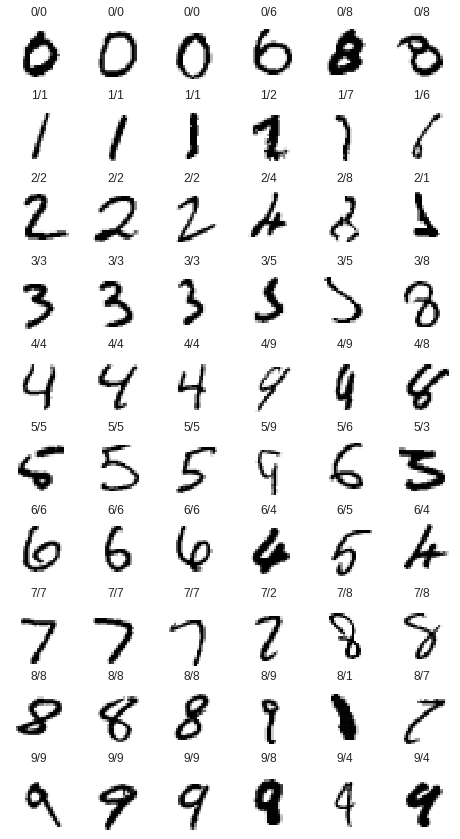

In [8]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})
#맞는 것과 틀린 것 세개씩 출력
fig = plt.figure(figsize = (8,15))
for i in range(10):
  c = 1
  for(image, label, pred) in zip(images, labels, p_val):
    prediction, actual = np.argmax(pred), np.argmax(label)#actual : 실제값
    if prediction != i:
      continue
    if (c < 4 and i == actual) or (c >= 4 and i!= actual):
      subplot = fig.add_subplot(10, 6, i*6 +c)
      subplot.set_xticks([])
      subplot.set_yticks([])
      subplot.set_title('%d/%d'%(prediction, actual))
      subplot.imshow(image.reshape((28,28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = "nearest")
      c += 1
      if c>6:
        break